# Sutton, Barto, 2015 - Chapter 2

## Figure 2.1, pg. 35

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from RL_tools.Bandits import Task

n_actions = 10
n_steps = 1000
n_runs = 1000

epsilons = [0, 0.01, 0.1]
eps_rewards = np.zeros((n_steps, len(epsilons)))
eps_optimal_actions = np.zeros((n_steps, len(epsilons)))

task_rewards = np.zeros((n_steps, n_runs))
optimal_actions = np.zeros((n_steps, n_runs))

for i, epsilon in enumerate(epsilons):
    for j in range(n_runs):
        task = Task(n_actions, n_steps, epsilon=epsilon)
        task.run_task()
        task_rewards[:, j] = task.reward_tracker
        optimal_actions[:, j] = task.optimal_action_tracker
        
    eps_rewards[:, i] = task_rewards.mean(axis=1)
    eps_optimal_actions[:, i] = optimal_actions.mean(axis=1)

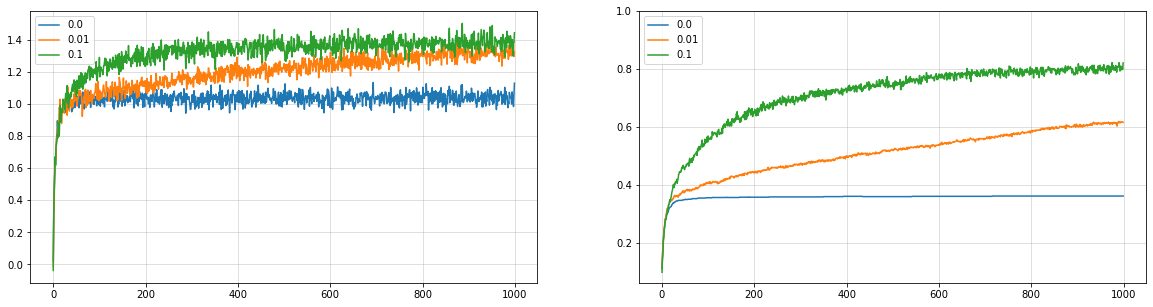

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,5))

rewards_df = pd.DataFrame(eps_rewards, columns=epsilons)
rewards_df.plot(ax=ax1)

opt_actions_df = pd.DataFrame(eps_optimal_actions, columns=epsilons)
opt_actions_df.plot(ax=ax2)
ax2.set_ylim(ymax=1)

for ax in (ax1, ax2):
    ax.grid(alpha=0.5)

## Figure 2.2, pg. 40

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from RL_tools.Bandits import Task

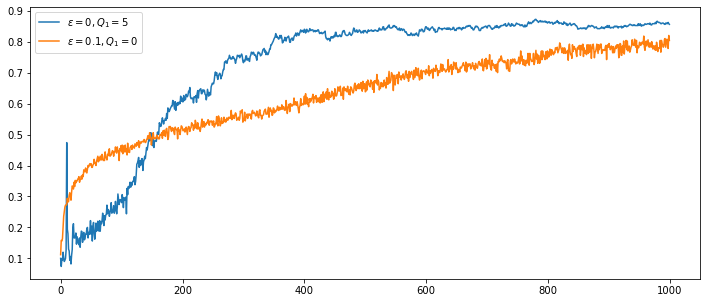

In [9]:
n_actions = 10
n_steps = 1000
n_runs = 500

fig, ax = plt.subplots(figsize=(12,5))

optimal_actions = np.zeros((n_steps, n_runs))

for j in range(n_runs):
    task = Task(n_actions, n_steps, reward_estimates_init=np.ones(n_actions)*5, epsilon=0., step_size=0.1)
    task.run_task()
    optimal_actions[:, j] = task.optimal_action_tracker
    
ax.plot(optimal_actions.mean(axis=1), label='$ε = 0, Q_1=5$')

optimal_actions = np.zeros((n_steps, n_runs))

for j in range(n_runs):
    task = Task(n_actions, n_steps, reward_estimates_init=np.zeros(n_actions), epsilon=0.1, step_size=0.1)
    task.run_task()
    optimal_actions[:, j] = task.optimal_action_tracker

ax.plot(optimal_actions.mean(axis=1), label='$ε = 0.1, Q_1=0$')
ax.legend()

## Figure 2.3, pg. 42

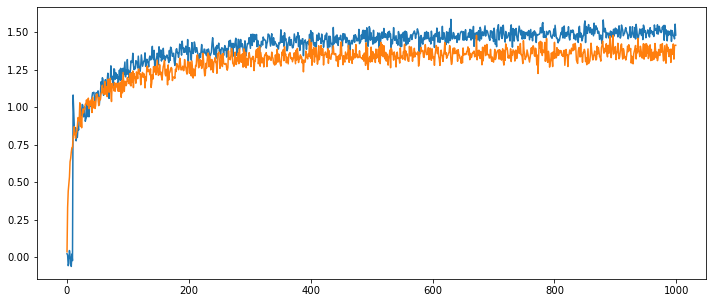

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from RL_tools.Bandits import Task

n_actions = 10
n_steps = 1000
n_runs = 1000

task_rewards = np.zeros((n_steps, n_runs))
optimal_actions = np.zeros((n_steps, n_runs))


plt.rc('figure', figsize=(12,5))

for r in range(n_runs):
    task = Task(n_actions, n_steps, selection='upper_confidence_bound')
    task.run_task()
    task_rewards[:, r] = task.reward_tracker

plt.plot(task_rewards.mean(axis=1), label='UCB, c=2')

for r in range(n_runs):
    task = Task(n_actions, n_steps, selection='epsilon_greedy', epsilon=0.1)
    task.run_task()
    task_rewards[:, r] = task.reward_tracker

plt.plot(task_rewards.mean(axis=1), label='ε-greedy')
plt.show()